## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
#install_all_packages()
load_library_packages()

## Clustering - Kmodes

In [3]:
df_during_facilitators_dist <- distinct(df_during_facilitators)
dim(df_during_facilitators_dist)

[1] 50  6

### Silhoette 
<hr />

In [4]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


#### Scanning parameters


In [5]:
source(here('Modules','modules.R'))
nseed <- 1000
nk <- nrow(distinct(df_during_facilitators))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     silhouette_scs <- c()
#     for (k in 2:nk) {
#         sc <- silhouette_values_kmodes(
#             num_clusters = k,
#             df = df_during_facilitators_dist,
#             diss_matrix = dissimilarity_matrix,
#             iters = 200,
#             s = seed)[[1]]

#         silhouette_scs <- append(silhouette_scs, sc)
#     }

#     ks_by_seed[seed, ] <- silhouette_scs
# }

# write.csv(
#     ks_by_seed,
#     "silhouette_kmodes_facilitators.csv", row.names = FALSE
# )

#### Results

In [6]:
scs <- read.csv("silhouette_kmodes_facilitators.csv")
scs[, ncol(scs)+1] <-  seq.int(nrow(scs))
colnames(scs) <- append(2:nrow(distinct(df_during_facilitators)), "seed")
head(scs)

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0.1767410,0.2483919,0.2770006,0.2968379,0.2963784,0.3128294,0.3128386,0.3332191,0.3359331,0.3483126,...,0.08050000,0.06000000,0.05000000,0.05000000,0.04000000,0.03000000,0.02000000,0.01,0,1
2,0.1797035,0.2118778,0.2254675,0.2496203,0.2625852,0.2701196,0.2885221,0.3107560,0.3236318,0.3113732,...,0.07733333,0.06733333,0.06733333,0.06733333,0.05733333,0.03000000,0.02000000,0.01,0,2
3,0.1686111,0.2940836,0.3095977,0.3169967,0.2996128,0.2895942,0.3437470,0.2558095,0.2788511,0.2810096,...,0.10983333,0.09983333,0.08983333,0.07933333,0.06066667,0.03333333,0.02333333,0.01,0,3
4,0.1846608,0.2595871,0.2737431,0.2769575,0.2567031,0.3573011,0.3638788,0.3640479,0.2878947,0.2784422,...,0.07650000,0.05266667,0.06266667,0.05266667,0.04333333,0.03333333,0.02000000,0.01,0,4
5,0.2084108,0.2032385,0.2406899,0.2524334,0.2738169,0.2657069,0.2586491,0.2347075,0.2514419,0.3123584,...,0.06000000,0.05000000,0.04000000,0.03000000,0.03000000,0.03000000,0.02000000,0.01,0,5
6,0.1624177,0.1786565,0.2634002,0.2544575,0.2587923,0.2661664,0.2814051,0.2844178,0.3013417,0.3106640,...,0.07666667,0.05800000,0.04800000,0.05266667,0.04866667,0.03866667,0.02866667,0.01,0,6


####  Best K and best seed by highest sample mean

In [7]:
print("Best K")
best_K_kmodes <- match(max(apply(scs, 2, mean)[1:ncol(scs)-1]), apply(scs, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(scs[, best_K_kmodes-1]), scs[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Silhouette")
print(max(scs[, best_K_kmodes-1]))

[1] "Best K"
[1] 12
[1] "Best Seed"
[1] 326
[1] "Silhouette"
[1] 0.4194691


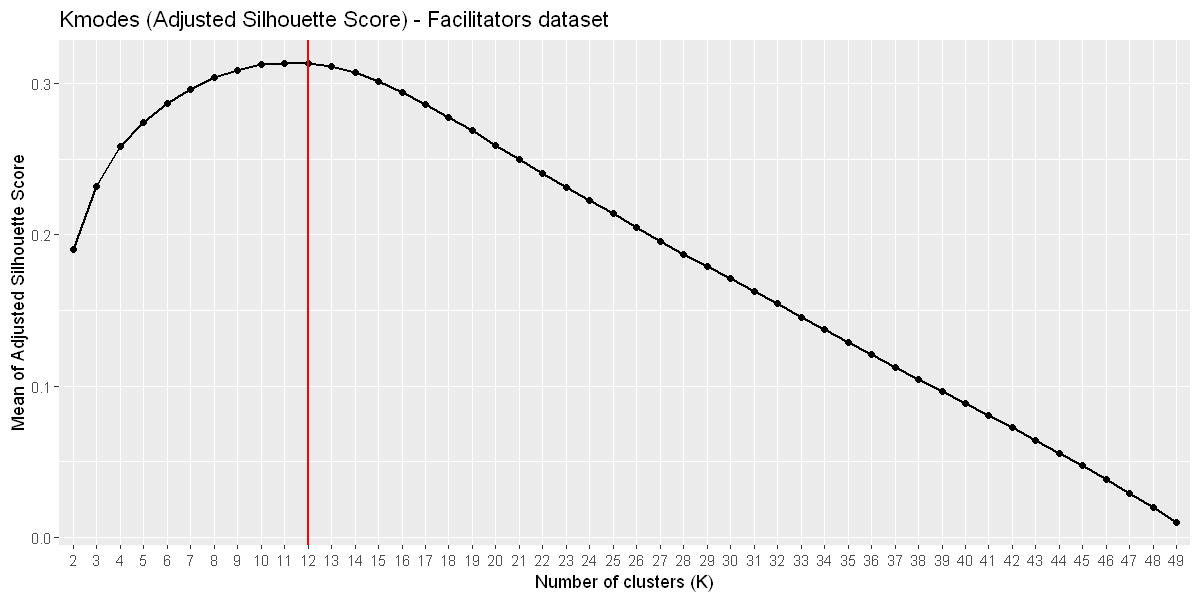

In [8]:

means_df <- data.frame(mean = apply(scs, 2, mean)[1:(nk-2)], k = names(apply(scs, 2, mean)[1:(nk-2)]))
options(repr.plot.width = 10, repr.plot.height =5)
ggplot(data=means_df, aes(x=factor(as.numeric(k)), y=mean, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_kmodes-1, color = "red", size=0.8) + 
    ggtitle("Kmodes (Adjusted Silhouette Score) - Facilitators dataset") +
    xlab('Number of clusters (K)') +
    ylab('Mean of Adjusted Silhouette Score')


ggsave(path="graphs", file="metric_evolution.jpeg", width = 10, height = 5)


#### Evaluating the silhuette coefficient for best seed

In [13]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

## Exploring Kmodes best k

In [14]:
chosen_kmode <- kmodes_seed(df_during_facilitators_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)
df_during_facilitators_dist$cluster <- chosen_kmode$cluster
head(df_during_facilitators_dist)

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,0,0,0,1,0,3
2,0,0,0,0,0,0,2
3,1,1,0,0,1,0,2
4,0,0,0,0,1,1,12
5,0,1,1,0,1,1,9
6,1,0,1,0,1,0,3


In [15]:
joint <- c(
    'PA_easiness_outdoor_activities'='PA_easiness_outdoor_activities',
    'PA_easiness_professional_guidance' = 'PA_easiness_professional_guidance',
    'PA_easiness_music' = 'PA_easiness_music',
    'PA_easiness_others' = 'PA_easiness_others',
    'PA_facilitator_home' = 'PA_facilitator_home',
    'PA_facilitator_group' = 'PA_facilitator_group'
)

df_during_facilitators <- left_join(df_during_facilitators, df_during_facilitators_dist, by = joint)
df_during$cluster <- df_during_facilitators$cluster
df_during_barriers$cluster <- df_during_facilitators$cluster

nrow(df_during_facilitators)

[1] 1214

In [16]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8   9  10  11  12 
 30 161 308  67   8  88  18  33  72 174  54 201 

### Profile Plots
<hr />

In [17]:
colors <- c("pink1", "violet", "mediumpurple1", "slateblue1", "purple", "purple3",
        "turquoise2", "skyblue", "steelblue", "blue2", "navyblue",
        "orange", "tomato", "coral2", "palevioletred", "violetred", "red2",
        "springgreen2", "yellowgreen", "palegreen4",
        "wheat2", "tan", "tan2", "tan3", "brown",
        "grey70", "grey50", "grey30")

In [ ]:
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_kmodes
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_barriers, 
    names = names(df_during_barriers[, 1:ncol(df_during_barriers)-1]),
    best_k = best_K_kmodes
)

#### Mode

In [19]:
chosen_kmode$mode

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,1,0
2,1,1,0,0,0,0
3,1,0,0,0,1,0
4,0,0,0,1,1,0
5,1,0,0,1,0,0
6,0,1,0,0,0,1
7,1,0,0,0,0,1
8,1,1,0,0,1,1
9,0,1,1,1,1,1
